In [272]:
import pandas as pd
import numpy as np

In [273]:
brent = pd.read_csv('BrentOilPrices.csv')
tech = pd.read_csv('tech_giants.csv', index_col=0, parse_dates=True)

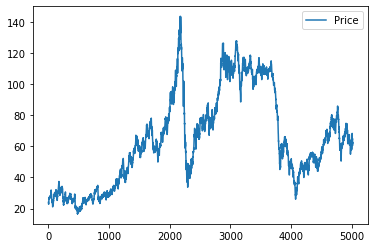

In [274]:
brent.plot()

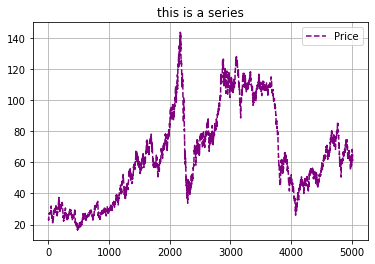

In [275]:
brent.plot(kind="line", grid=True, label="s1", title="this is a series", color='purple', style="--")

In [276]:
tech.head(5)

,month,year,day,name,open,close,high,low,volume,volume_type
date,,,,,,,,,,
2014-01-02,1,2014,2,FB,54.86,54.71,55.22,54.19,43257622,medium
2014-01-02,1,2014,2,AAPL,79.38,79.02,79.58,78.86,8398851,low
2014-01-02,1,2014,2,GOOGL,557.73,556.56,558.88,554.13,1822719,medium
2014-01-02,1,2014,2,MSFT,37.35,37.16,37.40,37.10,30643745,medium
2014-01-02,1,2014,2,AMZN,398.80,397.97,399.36,394.02,2140246,medium


In [277]:
fb = tech.loc[tech.name == 'FB', 'close'].rename('Facebook')
msft = tech.loc[tech.name == 'MSFT', 'close'].rename('Microsoft')
aapl = tech.loc[tech.name == 'AAPL', 'close'].rename('Apple')

In [278]:
fb

date
2014-01-02     54.71
2014-01-03     54.56
2014-01-06     57.20
2014-01-07     57.92
2014-01-08     58.23
               ...  
2019-08-19    186.17
2019-08-20    183.81
2019-08-21    183.55
2019-08-22    182.04
2019-08-23    177.75
Name: Facebook, Length: 1421, dtype: float64

In [279]:
dfs = pd.concat([fb, msft, aapl], axis=1)

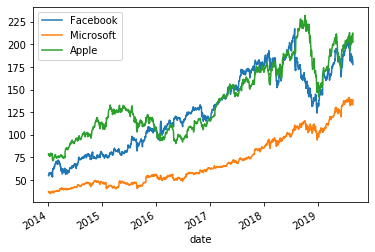

In [280]:
dfs.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ee9a46cd0>,
      dtype=object)

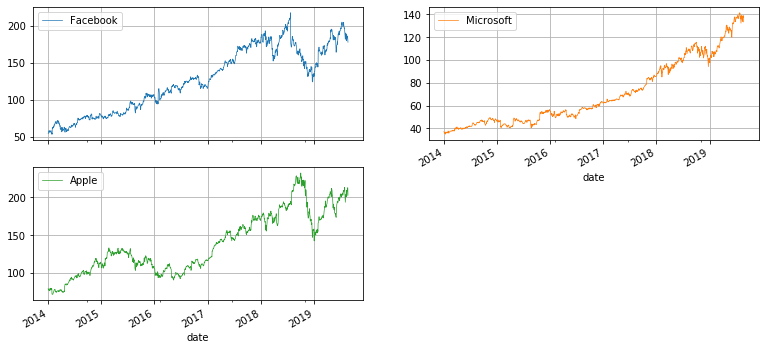

In [281]:
dfs.plot(subplots=True, linewidth=.7, figsize=(13, 6), grid=True, layout=(2, 2))

In [282]:
boston = pd.read_csv('2017BostonMarathonTop1000.csv')

Text(0, 0.5, '# of runners')

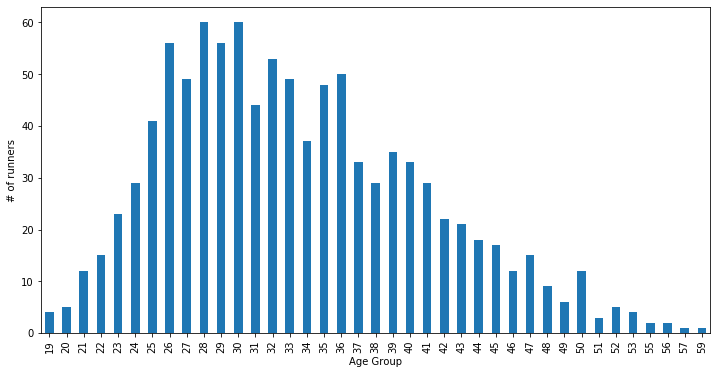

In [283]:
ax = boston.Age.value_counts(sort=False).plot(kind='bar', figsize=(12, 6)) # plot bar chart
ax.set_xlabel('Age Group')
ax.set_ylabel('# of runners')

In [284]:
ages = boston.Age
ages

0      24
1      30
2      25
3      32
4      31
       ..
995    38
996    43
997    40
998    35
999    35
Name: Age, Length: 1000, dtype: int64

In [285]:
bins = [-1, 20, 30, 40, 50, 60, np.inf]
labels = ['less than 20', '20 ~ 30', '30 ~ 40', '40 ~ 50', '50 ~ 60', 'more than 60']
ages = ages.groupby(pd.cut(ages, bins=bins, labels=labels)).size()
ages

Age
less than 20      9
20 ~ 30         401
30 ~ 40         411
40 ~ 50         161
50 ~ 60          18
more than 60      0
Name: Age, dtype: int64

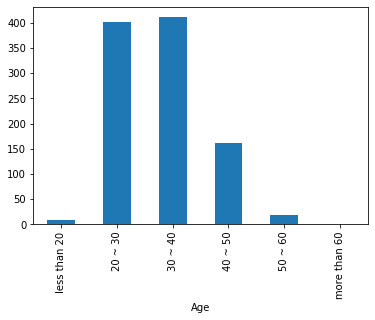

In [286]:
ages.plot(kind='bar')

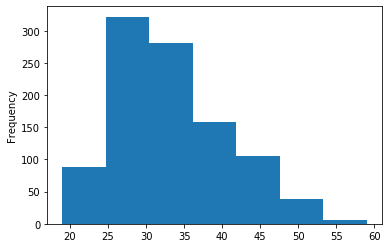

In [287]:
boston.Age.plot(kind='hist', bins = 7)

In [288]:
games = pd.read_csv('games_sales.csv')

In [289]:
games.NA_Sales

0       14.97
1        7.01
2        9.63
3        9.03
4        9.67
        ...  
3138     0.00
3139     0.01
3140     0.01
3141     0.00
3142     0.00
Name: NA_Sales, Length: 3143, dtype: float64

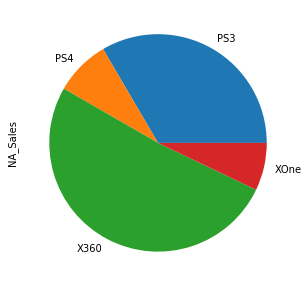

In [290]:
games.groupby('Platform').NA_Sales.sum().plot(kind='pie', figsize=(5, 5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ee4542950>,
      dtype=object)

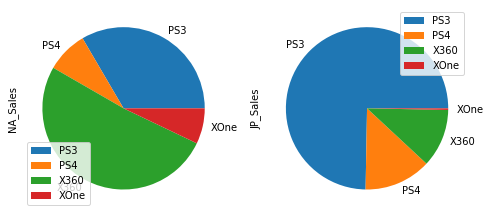

In [291]:
games.loc[:, ['NA_Sales', 'JP_Sales', 'Platform']].groupby('Platform').sum().plot(kind='pie', subplots=True, figsize=(8, 8))

In [292]:
sat = pd.read_csv('scores.csv')

In [293]:
sat.head()

,School Name,Borough,Student Enrollment,Percent Tested,SAT Section,Score
0,A. Philip Randolph Campus High School,Manhattan,1354,74.00%,Math,459
1,A. Philip Randolph Campus High School,Manhattan,1354,74.00%,Reading,453
2,A. Philip Randolph Campus High School,Manhattan,1354,74.00%,Writing,447
3,Abraham Lincoln High School,Brooklyn,2341,54.90%,Math,441
4,Abraham Lincoln High School,Brooklyn,2341,54.90%,Reading,422


In [294]:
math = sat[sat['SAT Section'] == 'Math'].Score.reset_index(drop=True)
writing = sat[sat['SAT Section'] == 'Writing'].Score.reset_index(drop=True)
reading = sat[sat['SAT Section'] == 'Reading'].Score.reset_index(drop=True)

In [295]:
math

0      459
1      441
2      444
3      386
4      381
      ... 
370    484
371    496
372    478
373    483
374    415
Name: Score, Length: 375, dtype: int64

In [296]:
scores = pd.concat([math, writing, reading], axis=1)
scores.columns = ['Math', 'Writing', 'Reading']

In [297]:
scores

,Math,Writing,Reading
0,459,447,453
1,441,422,422
2,444,444,458
3,386,393,397
4,381,390,397
...,...,...,...
370,484,487,491
371,496,473,481
372,478,472,465
373,483,477,464


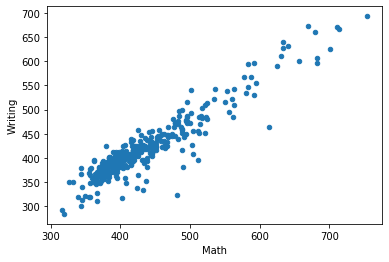

In [299]:
scores.plot(kind='scatter', x='Math', y='Writing')

In [300]:
import seaborn as sns

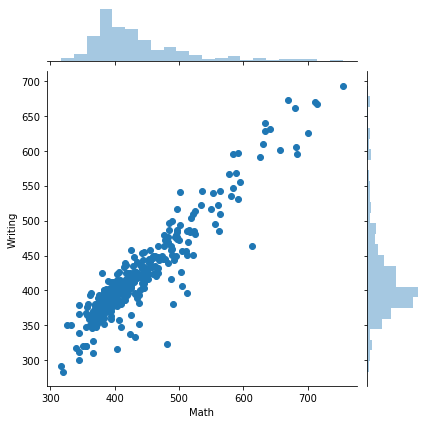

In [301]:
sns.jointplot('Math', 'Writing', scores, kind='scatter')

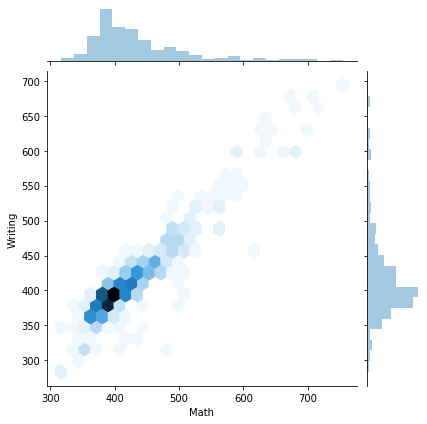

In [304]:
sns.jointplot('Math', 'Writing', scores, kind='hex')